# CUSTOMER CHURN PREDICTION


In [1]:
import pandas as pd

df= pd.read_csv('Downloads/Churn_Modelling.csv')
df = pd.DataFrame(df)
print(df)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [2]:
print("CHECKING NULL VALUES: \n", df.isnull().sum())

CHECKING NULL VALUES: 
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [3]:
df = df.drop('CustomerId', axis=1)
df = df.drop('Surname', axis=1)

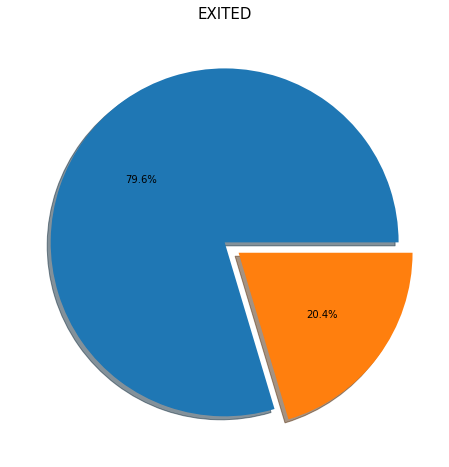

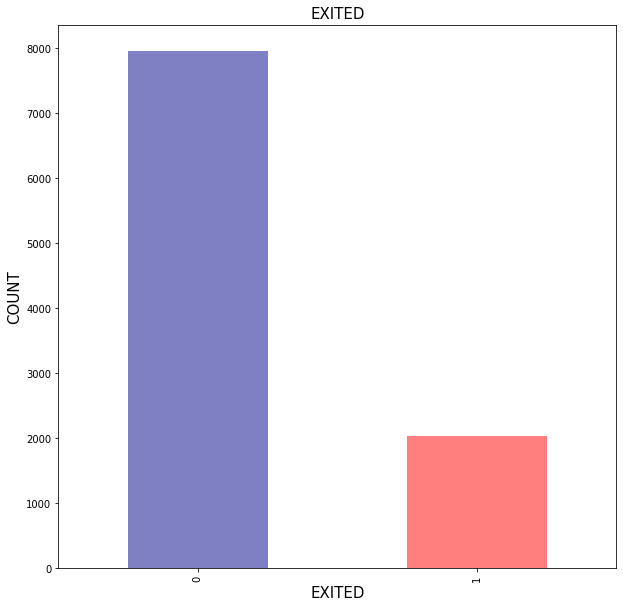

In [4]:
import matplotlib.pyplot as plt

explode = (0.0, 0.1)

plt.figure(figsize=(8, 8))
plt.pie(x=df['Exited'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True)
plt.title('EXITED', fontsize=15)
plt.plot()



plt.figure(figsize=(10, 10))

colors = ['darkblue','red']
df['Exited'].value_counts().plot(kind='bar', grid = False, fontsize=10, color=colors,alpha=0.5)
plt.title('EXITED', fontsize=15)
plt.xlabel('EXITED', fontsize=15)
plt.ylabel('COUNT', fontsize=15)
plt.xticks()
plt.show()

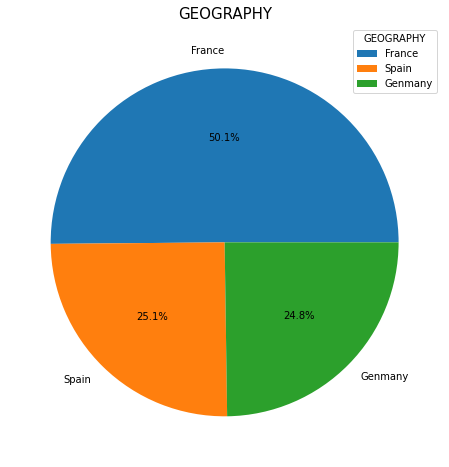

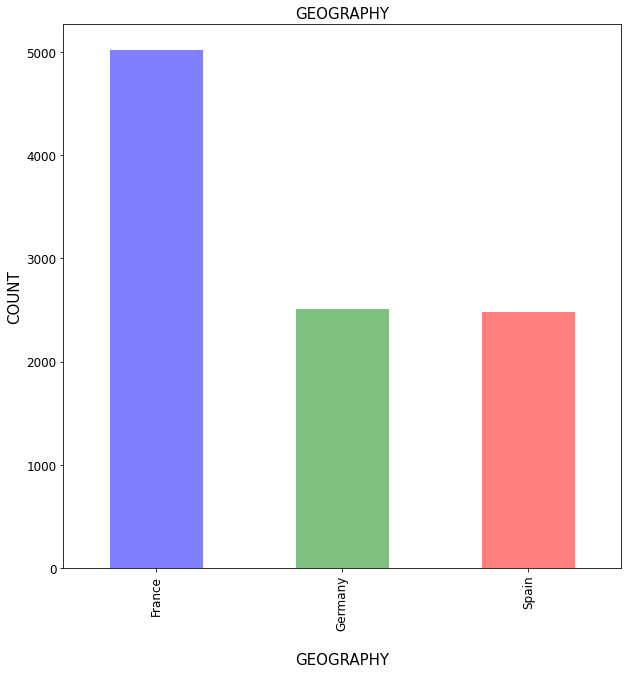

In [5]:
geo=["France","Spain", "Genmany"]
plt.figure(figsize=(8, 8))
plt.pie(x=df['Geography'].value_counts(), labels=geo, autopct='%1.1f%%')
plt.legend(geo, title='GEOGRAPHY')
plt.title('GEOGRAPHY', fontsize=15)
plt.plot()


plt.figure(figsize=(10, 10))

colors=["blue", "green", "red"]
df['Geography'].value_counts().plot(kind='bar', grid = False, fontsize=12, color=colors, alpha=0.5)
plt.title('GEOGRAPHY', fontsize=15)
plt.xlabel('\nGEOGRAPHY', fontsize=15)
plt.ylabel('COUNT', fontsize=15)
plt.xticks()
plt.show()

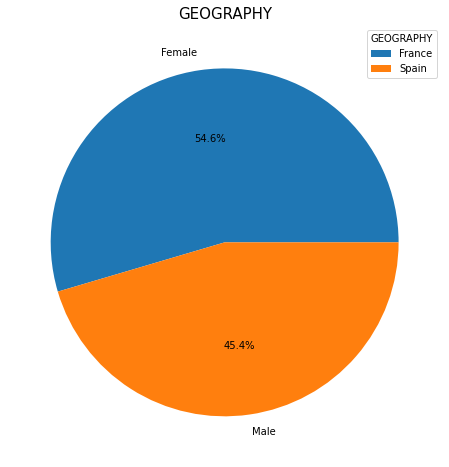

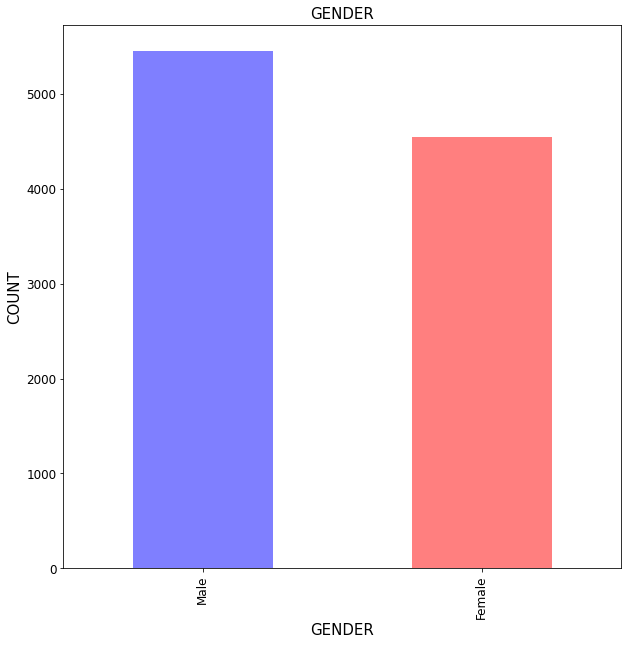

In [6]:
gen=["Female","Male"]
plt.figure(figsize=(8, 8))
plt.pie(x=df['Gender'].value_counts(), labels=gen, autopct='%1.1f%%')
plt.legend(geo, title='GEOGRAPHY')
plt.title('GEOGRAPHY', fontsize=15)
plt.plot()


plt.figure(figsize=(10, 10))

colors = ['blue','red']
df['Gender'].value_counts().plot(kind='bar', grid = False, fontsize=12, color=colors, alpha=0.5)
plt.title('GENDER', fontsize=15)
plt.xlabel('GENDER', fontsize=15)
plt.ylabel('COUNT', fontsize=15)
plt.xticks()
plt.show()

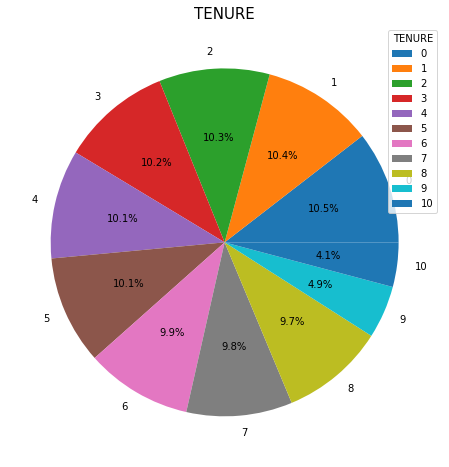

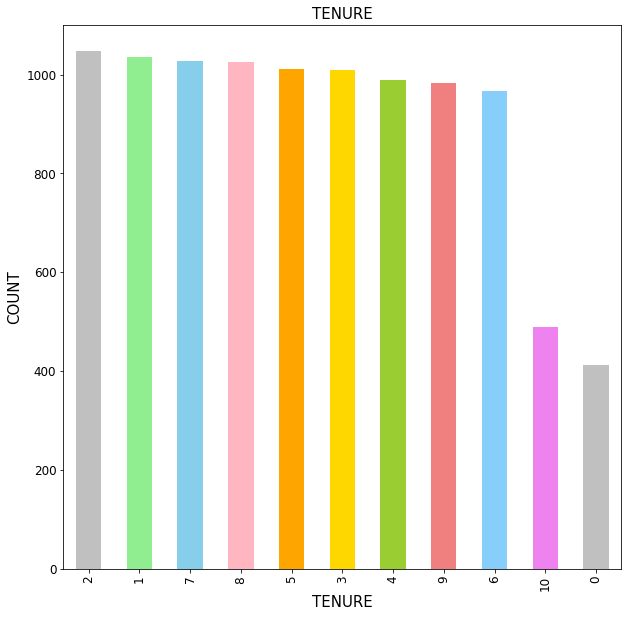

In [7]:
ten=[0,1,2,3,4,5,6,7,8,9,10]

plt.figure(figsize=(8, 8))
plt.pie(x=df['Tenure'].value_counts(), labels=ten, autopct='%1.1f%%')
plt.legend(ten, title='TENURE')
plt.title('TENURE', fontsize=15)
plt.plot()


plt.figure(figsize=(10, 10))

colors = ['silver', 'lightgreen', 'skyblue', 'lightpink', 'orange', 'gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'violet']
df['Tenure'].value_counts().plot(kind='bar', grid = False, fontsize=12, color=colors)
plt.title('TENURE', fontsize=15)
plt.xlabel('TENURE', fontsize=15)
plt.ylabel('COUNT', fontsize=15)
plt.xticks()
plt.show()

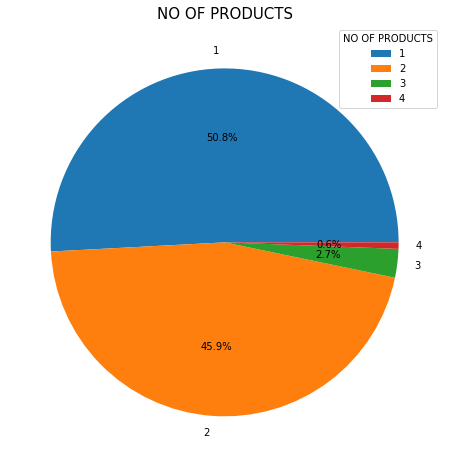

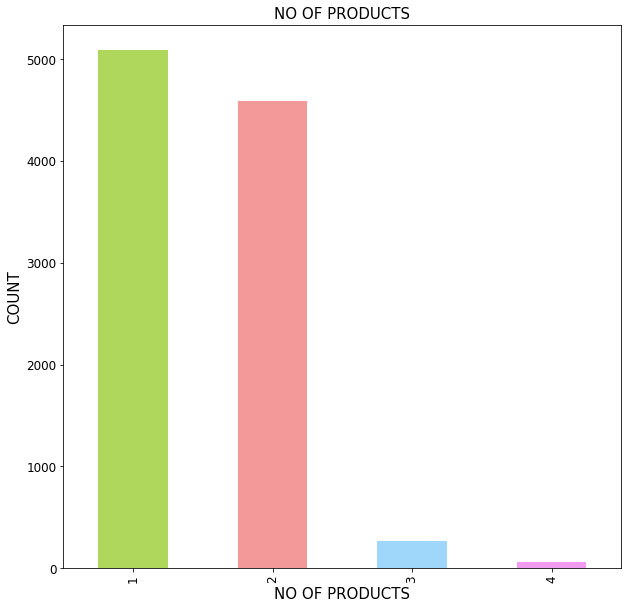

In [8]:
nop=[1,2,3,4]
plt.figure(figsize=(8, 8))
plt.pie(x=df['NumOfProducts'].value_counts(), labels=nop, autopct='%1.1f%%')
plt.legend(nop, title='NO OF PRODUCTS')
plt.title('NO OF PRODUCTS', fontsize=15)
plt.plot()


plt.figure(figsize=(10, 10))

colors = ['yellowgreen', 'lightcoral', 'lightskyblue', 'violet']
df['NumOfProducts'].value_counts().plot(kind='bar', grid = False, fontsize=12, color=colors, alpha=0.8)
plt.title('NO OF PRODUCTS', fontsize=15)
plt.xlabel('NO OF PRODUCTS', fontsize=15)
plt.ylabel('COUNT', fontsize=15)
plt.xticks()
plt.show()

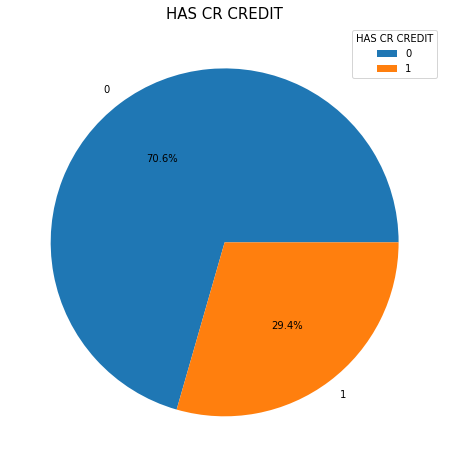

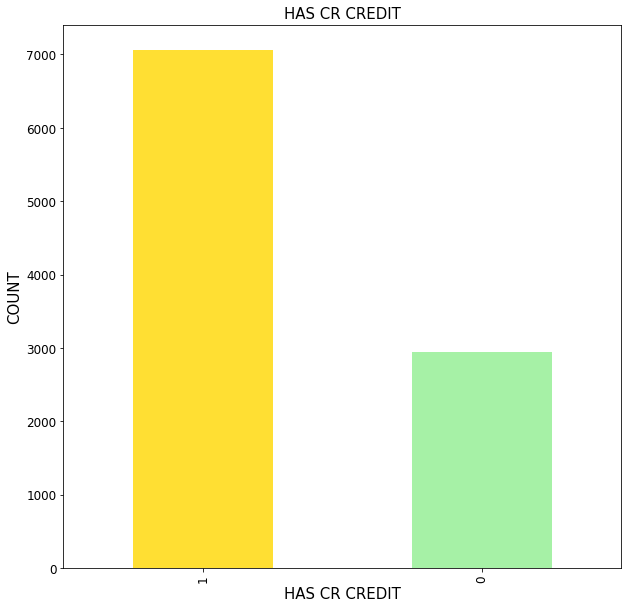

In [9]:
hcc=[0,1]
plt.figure(figsize=(8, 8))
plt.pie(x=df['HasCrCard'].value_counts(), labels=hcc, autopct='%1.1f%%')
plt.legend(hcc, title='HAS CR CREDIT')
plt.title('HAS CR CREDIT', fontsize=15)
plt.plot()


plt.figure(figsize=(10, 10))

colors = ['gold', 'lightgreen']
df['HasCrCard'].value_counts().plot(kind='bar', grid = False, fontsize=12, color=colors, alpha=0.8)
plt.title('HAS CR CREDIT', fontsize=15)
plt.xlabel('HAS CR CREDIT', fontsize=15)
plt.ylabel('COUNT', fontsize=15)
plt.xticks()
plt.show()

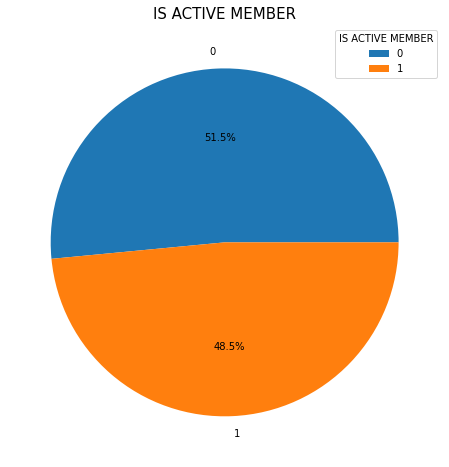

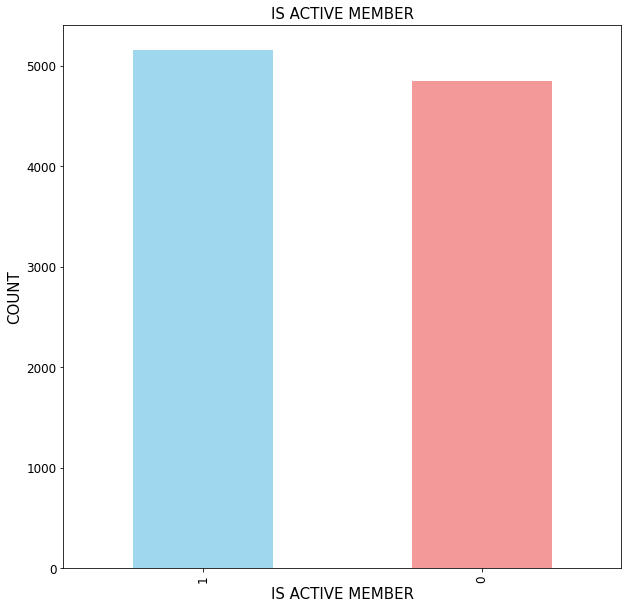

In [10]:
isam=[0,1]
plt.figure(figsize=(8, 8))
plt.pie(x=df['IsActiveMember'].value_counts(), labels=isam, autopct='%1.1f%%')
plt.legend(isam, title='IS ACTIVE MEMBER')
plt.title('IS ACTIVE MEMBER', fontsize=15)
plt.plot()


plt.figure(figsize=(10, 10))

colors = ['skyblue', 'lightcoral']
df['IsActiveMember'].value_counts().plot(kind='bar', grid = False, fontsize=12, color=colors, alpha=0.8)
plt.title('IS ACTIVE MEMBER', fontsize=15)
plt.xlabel('IS ACTIVE MEMBER', fontsize=15)
plt.ylabel('COUNT', fontsize=15)
plt.xticks()
plt.show()

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, confusion_matrix, cohen_kappa_score

def classify_report(ytest,y_pred):
    cm = confusion_matrix(ytest,y_pred)
    cr = classification_report(ytest,y_pred)
    accuracyscore = accuracy_score(ytest,y_pred)
    errorrate = 1-accuracyscore
    cohenkappascore = cohen_kappa_score(ytest,y_pred)
    
    print ("\nClassification Report:\n")
    print("Confusion Matrix: ", cm)
    print("\nAccuracy: ", accuracyscore)
    print("\nError Rate: ",errorrate )
    print("\nKappa Score: ", cohenkappascore)

In [12]:
from sklearn.preprocessing import LabelBinarizer

one_hot = LabelBinarizer()
df['Gender'] = one_hot.fit_transform(df['Gender'])

geography_mapper = {'France':1, 'Spain':2, 'Germany':3}
df['Geography'] = df['Geography'].replace(geography_mapper)

In [19]:
from sklearn.model_selection import train_test_split

x = df.iloc[:, 1:11].values
y = df.iloc[:,11].values

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3, random_state=0)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

logisticclassifier = LogisticRegression()
logisticclassifier.fit(xtrain,ytrain)

y_pred_lr = logisticclassifier.predict(xtest)

r2score = r2_score(ytest,y_pred_lr)
mae = mean_absolute_error(y_true=ytest, y_pred=y_pred_lr)
mse = mean_squared_error(y_true=ytest, y_pred=y_pred_lr)
rmse = mean_squared_error(y_true=ytest, y_pred=y_pred_lr, squared=False)

print("R-Squared Score: ", r2score)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

print('\n')
classify_report(ytest, y_pred_lr)

R-Squared Score:  -0.3158616152201328
MAE:  0.216
MSE:  0.216
RMSE:  0.46475800154489



Classification Report:

Confusion Matrix:  [[2316   63]
 [ 585   36]]

Accuracy:  0.784

Error Rate:  0.21599999999999997

Kappa Score:  0.04567505235532687


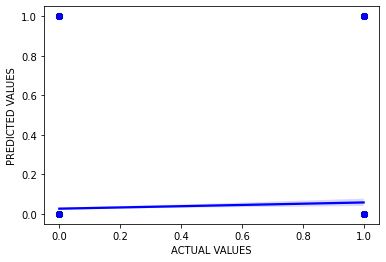

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = sns.regplot(x=ytest,y=y_pred_lr, color='blue')
plt.xlabel('ACTUAL VALUES')
plt.ylabel('PREDICTED VALUES')
plt.show(fig)

In [23]:
CreditScore = input('CreditScore: ')
Geography = input('Geography: ')
Gender = input('Gender: ')
Age = input('Age: ')
Tenure = input('Tenure: ')
Balance = input('Balance: ')
NumOfProducts = input('NumOfProducts: ')
HasCrCard = input('HasCrCard: ')
IsActiveMember = input('IsActiveMember: ')
EstimatedSalary = input('EstimatedSalary: ')


predict = {
    'CreditScore':[CreditScore],
    'Geography':[Geography], 
    'Gender':[Gender],
    'Age':[Age],
    'Tenure':[Tenure],
    'Balance':[Balance],
    'NumOfProducts':[NumOfProducts],
    'HasCrCard':[HasCrCard],
    'IsActiveMember':[IsActiveMember],
    'EstimatedSalary':[EstimatedSalary],
}

predict_data = pd.DataFrame(predict)

from sklearn.linear_model import LogisticRegression

logisticclassifier = LogisticRegression()
logisticclassifier.fit(xtrain,ytrain)
y_pred_lr = logisticclassifier.predict(predict_data)

print('\nEXITED OR NOT: ', y_pred_lr[0])

CreditScore: 608
Geography: 2
Gender: 0
Age: 41
Tenure: 1
Balance: 83807.86
NumOfProducts: 1
HasCrCard: 0
IsActiveMember: 1
EstimatedSalary: 112542.58

EXITED OR NOT:  0


C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
